# STEP ZERO
You may want to consult the [notebook provided for this week](https://colab.research.google.com/drive/176yS-mw-fO0JI1CAN97wgmyRx0N9xriI?usp=sharing). It has everything you need to complete the steps below.

 In this notebook you will need to fill in some missing code to answer the questions below.
You will need to scroll down towards the bottom of this notebook to see the instructions.

Remember, with later versions of keras you must access it via 'tensorflow.keras' and not only 'keras', e.g., `from tensorflow.keras.layers import Dense`

In [1]:
from numpy.random import seed
seed(0)
from tensorflow.random import set_seed
set_seed(0)
import tensorflow as tf
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def load_data():
  from tensorflow.keras.datasets import cifar10
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  return (x_train, y_train), (x_test, y_test)

In [ ]:
def display_image(data, index):
  image = data[index]
  # call method to show image here.
  plt.imshow(image)
  plt.show()

In [ ]:
def onehotencode(y_train, y_test):
  from tensorflow.keras.utils import to_categorical
  y_train_categorical = to_categorical(y_train)
  y_test_categorical = to_categorical(y_test)
  return y_train_categorical, y_test_categorical

In [ ]:
def reshape_data_cnn(x_train, x_test):

  height = x_train.shape[1]
  width = x_train.shape[2]
  channels = 3
  
  # reshape train and test data here.
  x_train_cnn = x_train.reshape(x_train.shape[0], height, width, channels)
  x_test_cnn = x_test.reshape(x_test.shape[0], height, width, channels)

  return x_train_cnn, x_test_cnn

In [ ]:
def build_fit_eval_model(x_train, x_test, y_train_categorical, y_test_categorical):
  import numpy as np
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.layers import Conv2D
  from tensorflow.keras.layers import MaxPooling2D
  from tensorflow. keras.layers import Flatten

  height = x_train.shape[1]
  width = x_train.shape[2]
  channels = 3
  num_classes = len(np.unique(y_train))


  # build model here.
  model = Sequential()

  model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(height, width, channels)))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  """
  one common approach is to add more filters as we add more layers.. the idea being that the early layers 'learn' 
  more specific features such as edges in an image while later layers learn more specific features.. 
  while early layers may learn to detect lines, later filters may learn to detect sleeves of a shirt, or heels of a shoe
  """
  model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(height, width, channels)))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  """
  once we finish convolutions, we need to squish or non 1D output into something a 
  fully connected neural network can process.
  you can think of the convolution layers as learning image features, while the fully connected
  layer below is performing classification using them.
  """
  model.add(Flatten())
  """
  now that we have squished, or flattened it, we can either just add one more layer that we want to be our 
  predicted class probablities, or we can add some more dense (for e.g.) layers first..
  the final dense layer will be our output layer, producing probablities that the image belongs to each class
  """
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))


  # compile model here
  model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


  # fit/train model here
  history = model.fit(x_train_cnn, y_train_categorical, epochs=10)

  # evaluate model on test set here
  loss, accuracy = model.evaluate(x_test_cnn, y_test_categorical)

  return model

In [ ]:
def make_predictions(model, data, image):
  display_image(x_test, image[0])

  predictions = model.predict(data[image])
  return predictions[0]

# STEP ONE

You need to fill in the code for the load_data function above. Scroll up to the load_data function and import and load the CIFAR10 dataset from Keras (https://keras.io/api/datasets/cifar10/). CIFAR10 is a dataset of 70,000 labeled images, each belonging to one of ten classes.

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

# STEP TWO
You need to fill in the code for the display_image function above. In this function you should write two lines of code. The first will select the datapoint at the supplied index of the supplied dataset. The second line should plot it.

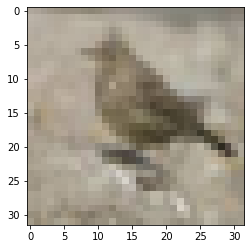

In [ ]:
display_image(x_train, 120) 

# STEP THREE
You need to fill in the code for the onehotenencode function above. The function should one hot encode the training and test labels, and return them.

In [ ]:
y_train_categorical, y_test_categorical = onehotencode(y_train, y_test)

# STEP FOUR
You need to fill in the code for the reshape_data_cnn function above. This function should take the data supplied as arguments, and format it such that it can be used with a CNN.

In [ ]:
x_train_cnn, x_test_cnn = reshape_data_cnn(x_train, x_test)

# STEP FIVE
You need to finish implementting the code in the build_fit_eval_model function above. In this you should consult the guide in the Assignment question. It will require you to build the model using the layers specified, train (fit) the model for the required number of epochs and then evaluate the trained model on the test dataset.

In [ ]:
model = build_fit_eval_model(x_train, x_test, y_train_categorical, y_test_categorical)

Epoch 1/10
1563/1563 [==============================] - 16s 9ms/step - loss: 2.0689 - accuracy: 0.2699
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3673 - accuracy: 0.5116
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1867 - accuracy: 0.5840
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0651 - accuracy: 0.6299
Epoch 5/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9864 - accuracy: 0.6579
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9110 - accuracy: 0.6839
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8456 - accuracy: 0.7073
Epoch 8/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7884 - accuracy: 0.7263
Epoch 9/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7296 - accuracy: 0.7463
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss

# STEP SIX
Now the data is loaded and prepared, the next task is to design a CNN with a single convolutional layer, a single max pooling layer, and two dense layers. 

* The convolutional layer should have 32 filters, padding should be the 'same' and the kernel size should be 5x5. 
* The max pooling layer should have a pool size of 2x2 and stride size of 2x2. 
The dense layers should have 32 and num_classes neurons (units), respectively. 
 * All activation functions should be relu, except for the final layer which should be softmax. 
* The optimizer should be SGD with a learning rate of 0.001.
* Train the network for 10 epochs.


Train this network (model.fit()) and evaluate it on the test set (model.evaluate()).

Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset?

# STEP SEVEN
Let's modify the CNN to improve performance.

Add another another convolutional blocks (Conv2D + Max Pooling) after the first, with the same hyperparameters as the first, but double the number of filters.

Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset?


# STEP EIGHT

Let's modify the CNN further to improve performance.

Add another Dense layer, before the first Dense layer in the network. Give it 64 neurons with relu activation.

Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset?


# STEP NINE

Let's try something else. There are many different ways of modifying the network further. For example, we could change the optimizer. SGD is one way of optimizing our neural network, however, more complex optimizers are available. While the theory of them are outside the scope of this unit (deep learning could be unit on its own), they are worth knowing about if you are doing deep learning. Perhaps the most widely used optimizer in deep neural networks is the Adam optimizer, which is an extension of SGD. Thankfully, to use them is easy. Update the optimizer in in the model compile function to use the Adam optimiser with a learning rate of 0.001.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam



Note, each time you train the CNN, you should do so by going to Runtime -> Restart and Run All.

What is the accuracy of this CNN on the test dataset? Report the percentage.

# STEP TEN

I have provided a function called 'make_predictions'. Use this function, supplying indexes 333 and 1375 of the test set.

The labels map to the class names as follows:
* 0 is airplane
* 1 is automobile
* 2 is bird
* 3 is cat 
* 4 is deer
* 5 is dog
* 6 is frog
* 7 is horse
* 8 is ship
* 9 is truck

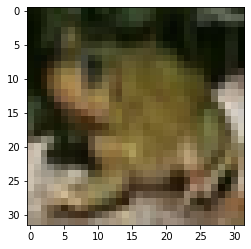

[4.0030347e-05 7.5111509e-04 5.8117257e-03 7.6403492e-03 4.2924928e-03
 2.0610085e-03 9.7802812e-01 4.6669858e-04 8.8331860e-04 2.5176016e-05]
0.9780281


In [ ]:

# indices should be a list
data = x_test_cnn
image = [333]
predictions = make_predictions(model, data, image)

print(predictions)
print(max(predictions))
